In [15]:
!pip3 install matplotlib
!pip3 install pandas
!pip3 install wordcloud

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [56]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd


In [129]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
       #print("Line {}: {}".format(cnt, line))
        if line.startswith('RACHEL:'):
            Rachel.append(line[8:])
        elif line.startswith('ROSS:'):
            Ross.append(line[6:])
        elif line.startswith('MONICA:'):
            Monica.append(line[8:])
        elif line.startswith('CHANDLER:'):
            Chandler.append(line[10:])
        if line.startswith('PHOEBE:'):
            Phoebe.append(line[8:])
        if line.startswith('JOEY:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [130]:
friends_chars['ROSS']


["I got it. Uh, Joey, women don't have Adam's apples.\n",
 'Not hating Yanni is not a real reason.\n',
 "We'll give you Janice.\n",
 "Whoa, whoa, whoa. What, you don't, uh, you don't believe in evolution?\n",
 "You don't believe in evolution?\n",
 'Too easy? Too...The process of every living thing on this planet evolving over millions of years from single-celled organisms, too easy?\n',
 'Uh, excuse me. Evolution is not for you to buy, Phoebe. Evolution is scientific fact, like, like, like the air we breathe, like gravity.\n',
 "You uh, you don't believe in gravity?\n",
 'How can you not believe in evolution?\n',
 'Pheebs, I have studied evolution my entire adult life. Ok, I can tell you, we have collected fossils from all over the world that actually show the evolution of different species, ok? You can literally see them evolving through time.\n',
 'You bet. In the U.S., China, Africa, all over.\n',
 'Well, there you go.\n',
 "Ok, Pheebs. See how I'm making these little toys move? Opp

In [131]:
friends_chars['RACHEL']


['Come on, they were not that huge.\n',
 "You don't have birds.\n",
 'All right, bye-bye.\n',
 '"Oh, my, god."\n',
 'We won. We won!\n',
 'How did this happen?\n',
 "Ok, so let's talk money.\n",
 'Have you ever seen so much crap?\n',
 'Monica, Monica, look at this lamp. Is this tacky or what? We have to have this.\n',
 "What? Come on, it's not like I'm asking for this girly clock or anything, which, by the way, I also think is very cool.\n",
 'Well, what about my stuff?\n',
 "You still think of it as your apartment, don't you?\n",
 "Yes you do. You think of it as your apartment, and I'm just somebody who rents a room.\n",
 'Ok, while you "mmm" on it for awhile, I\'m gonna go find a place for my new lamp.\n',
 'What?\n',
 'Monica, let it go.\n',
 "Well, then, you'll just have to eat the other lamps.\n",
 'I am. Let me just get my coat.\n',
 "Oh, please, Monica. You've always hated my lamp, and then, all of a sudden, it's just magically broken?\n",
 'Hey Chandler. Monica just broke my se

In [132]:
friends_chars['MONICA']


['So how was Joan?\n',
 'How many perfectly fine women are you gonna reject over the most superficial insignificant things?\n',
 'Hello, Mr. Heckles.\n',
 "We're not doing anything.\n",
 "Ok, Mr. Heckles, we'll try to keep it down.\n",
 "Stop with the broom, we're not making noise.\n",
 'Mr. Heckles.\n',
 "That's terrible.\n",
 'What can we do for you?\n',
 'Well, what about his family?\n',
 "I can't believe that this whole time we thought he hated us. I mean, isn't it amazing how much you can touch someone's life, without even knowing it?...Would you look at this dump? He hated us. This is his final revenge!\n",
 'Rache, I think we have enough regular lamps.\n',
 "It doesn't go with any of my stuff.\n",
 "You don't have any stuff.\n",
 'No.\n',
 'Mmmmm.\n',
 "Hey, Rache. You know what we haven't played in a while?\n",
 'Hide the Lamp.\n',
 'Did you know I was allergic to shellfish?\n',
 'Ok, all right. It was an accident, I swear, all right. I was putting on my jacket, and the thing, 

In [133]:
friends_chars['PHOEBE']


['You name one woman that you broke up with for a real reason.\n',
 'I miss Janice though. "Hello, Chandler Bing."\n',
 "Ok, it's very faint, but I can still sense him in the building. Go into the light, Mr. Heckles!\n",
 "I'm sorry, but sometimes they need help. That's fine. Go ahead and scoff. You know, there're a lot of things that I don't believe in, but that doesn't mean they're not true.\n",
 'Like crop circles, or the Bermuda triangle, or evolution?\n',
 'Nah. Not really.\n',
 "I don't know, it's just, you know...monkeys, Darwin, you know, it's a, it's a nice story, I just think it's a little too easy.\n",
 "Yeah, I just don't buy it.\n",
 "Ok, don't get me started on gravity.\n",
 "Well, it's not so much that you know, like I don't believe in it, you know, it's just...I don't know, lately I get the feeling that I'm not so much being pulled down as I am being pushed.\n",
 "Just don't. Look at this funky shirt!\n",
 'Really? You can actually see it?\n',
 "See, I didn't know that.

In [134]:
friends_chars['JOEY']


["Hold it hold it. I gotta side with Chandler on this one. When I first moved to the city, I went out a couple of times with this girl, really hot, great kisser, but she had the biggest Adam's apple. It made me nuts.\n",
 "You guys are messin' with me, right?\n",
 'That was a good one. For a second there, I was like, "whoa."\n',
 '"Oh, Chandler, now, now, that\'s it. There, faster!"\n',
 'Such as?\n',
 'Check this out. Can I have this?\n',
 "Hey, there's me! April 17th. Excessive noise. Italian guy comes homes with a date. Hey Chandler, look, you're in here too.\n",
 "Check it out, check it out. Heckles' high school yearbook.\n",
 '"Heckles, you crack me up in science class. You\'re the funniest kid in school.\n',
 "That's what it says.\n",
 'What?\n',
 'So, you were both dorks. Big deal.\n',
 'Have you been here all night?\n',
 'Chandler, Heckles was a nut case.\n',
 "All right, you know what we gotta do? We gotta get you outta here. Come on, I'll buy you breakfast, let's go.\n",
 "Ch

In [135]:
friends_chars['CHANDLER']


['Hey.\n',
 'I broke up with her.\n',
 'They were huge. When she sneezed, bats flew out of them.\n',
 "I'm tellin' you, she leaned back, I could see her brain.\n",
 'You or me?\n',
 'Maureen Rosilla.\n',
 "Ok, Janice. Janice. You gotta give me Janice. That wasn't about being picky.\n",
 'Ok, Phoebe.\n',
 "Uh-Oh. It's Isaac Newton, and he's pissed.\n",
 'Actually, I think this apartment sullies the good name of crap\n',
 'Hey, look at this. "My Big Book of Grievances."\n',
 "April 18th, excessive noise. Italian guy's gay roommate comes home with the dry-cleaning. Well that's excellent.\n",
 'Wow, he looks so normal.\n',
 'Funniest? Heckles?\n',
 'Wow, Heckles was voted class clown, and so was I. He was right. Would you listen to that?\n',
 'Whoa!\n',
 "Heckles played clarinet in band, and I played clarinet. And he was in the scale modeler's club, and I was, well, there was no club, but I sure thought they were cool.\n",
 "I just think it's weird, you know? Heckles and me, Heckles, and m

In [136]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
    
stop_words = set(stopwords.words('english')) 

def clean_data(val):
    word_tokens = word_tokenize(str(val).strip('[]') )

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 

    filtered_sentence = [] 

    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 

    #filtered_sentence= ''.join(c for c in filtered_sentence if c not in '\\n ``')

    #print(word_tokens) 
    return filtered_sentence
    



In [137]:
print(clean_data(friends_chars['RACHEL'])) 


["'Come", ',', 'huge.\\n', "'", ',', '``', 'You', "n't", 'birds.\\n', "''", ',', "'All", 'right', ',', 'bye-bye.\\n', "'", ',', "'", "''", 'Oh', ',', ',', 'god', '.', '``', '\\n', "'", ',', "'We", '.', 'We', '!', '\\n', "'", ',', "'How", 'happen', '?', '\\n', "'", ',', '``', 'Ok', ',', 'let', "'s", 'talk', 'money.\\n', "''", ',', "'Have", 'ever', 'seen', 'much', 'crap', '?', '\\n', "'", ',', "'Monica", ',', 'Monica', ',', 'look', 'lamp', '.', 'Is', 'tacky', '?', 'We', 'this.\\n', "'", ',', '``', 'What', '?', 'Come', ',', "'s", 'like', 'I', "'m", 'asking', 'girly', 'clock', 'anything', ',', ',', 'way', ',', 'I', 'also', 'think', 'cool.\\n', "''", ',', "'Well", ',', 'stuff', '?', '\\n', "'", ',', '``', 'You', 'still', 'think', 'apartment', ',', "n't", '?', '\\n', "''", ',', '``', 'Yes', '.', 'You', 'think', 'apartment', ',', 'I', "'m", 'somebody', 'rents', 'room.\\n', "''", ',', "'Ok", ',', '``', 'mmm', "''", 'awhile', ',', 'I\\', "'m", 'gon', 'na', 'go', 'find', 'place', 'new', 'lamp.\\

In [138]:
print(clean_data(friends_chars['ROSS'])) 


['``', 'I', 'got', '.', 'Uh', ',', 'Joey', ',', 'women', "n't", 'Adam', "'s", 'apples.\\n', "''", ',', "'Not", 'hating', 'Yanni', 'real', 'reason.\\n', "'", ',', '``', 'We', "'ll", 'give', 'Janice.\\n', "''", ',', '``', 'Whoa', ',', 'whoa', ',', 'whoa', '.', 'What', ',', "n't", ',', 'uh', ',', "n't", 'believe', 'evolution', '?', '\\n', "''", ',', '``', 'You', "n't", 'believe', 'evolution', '?', '\\n', "''", ',', "'Too", 'easy', '?', 'Too', '...', 'The', 'process', 'every', 'living', 'thing', 'planet', 'evolving', 'millions', 'years', 'single-celled', 'organisms', ',', 'easy', '?', '\\n', "'", ',', "'Uh", ',', 'excuse', '.', 'Evolution', 'buy', ',', 'Phoebe', '.', 'Evolution', 'scientific', 'fact', ',', 'like', ',', 'like', ',', 'like', 'air', 'breathe', ',', 'like', 'gravity.\\n', "'", ',', '``', 'You', 'uh', ',', "n't", 'believe', 'gravity', '?', '\\n', "''", ',', "'How", 'believe', 'evolution', '?', '\\n', "'", ',', "'Pheebs", ',', 'I', 'studied', 'evolution', 'entire', 'adult', 'lif

In [139]:
print(clean_data(friends_chars['JOEY'])) 


['``', 'Hold', 'hold', '.', 'I', 'got', 'ta', 'side', 'Chandler', 'one', '.', 'When', 'I', 'first', 'moved', 'city', ',', 'I', 'went', 'couple', 'times', 'girl', ',', 'really', 'hot', ',', 'great', 'kisser', ',', 'biggest', 'Adam', "'s", 'apple', '.', 'It', 'made', 'nuts.\\n', "''", ',', '``', 'You', 'guys', 'messin', "'", ',', 'right', '?', '\\n', "''", ',', "'That", 'good', 'one', '.', 'For', 'second', ',', 'I', 'like', ',', '``', 'whoa', '.', '``', '\\n', "'", ',', "'", "''", 'Oh', ',', 'Chandler', ',', ',', ',', 'that\\', "'s", '.', 'There', ',', 'faster', '!', '``', '\\n', "'", ',', "'Such", '?', '\\n', "'", ',', "'Check", '.', 'Can', 'I', '?', '\\n', "'", ',', '``', 'Hey', ',', "'s", '!', 'April', '17th', '.', 'Excessive', 'noise', '.', 'Italian', 'guy', 'comes', 'homes', 'date', '.', 'Hey', 'Chandler', ',', 'look', ',', "'re", 'too.\\n', "''", ',', '``', 'Check', ',', 'check', '.', 'Heckles', "'", 'high', 'school', 'yearbook.\\n', "''", ',', "'", "''", 'Heckles', ',', 'crack', '

In [140]:
print(clean_data(friends_chars['MONICA'])) 


["'So", 'Joan', '?', '\\n', "'", ',', "'How", 'many', 'perfectly', 'fine', 'women', 'gon', 'na', 'reject', 'superficial', 'insignificant', 'things', '?', '\\n', "'", ',', "'Hello", ',', 'Mr.', 'Heckles.\\n', "'", ',', '``', 'We', "'re", 'anything.\\n', "''", ',', '``', 'Ok', ',', 'Mr.', 'Heckles', ',', "'ll", 'try', 'keep', 'down.\\n', "''", ',', '``', 'Stop', 'broom', ',', "'re", 'making', 'noise.\\n', "''", ',', "'Mr", '.', 'Heckles.\\n', "'", ',', '``', 'That', "'s", 'terrible.\\n', "''", ',', "'What", '?', '\\n', "'", ',', "'Well", ',', 'family', '?', '\\n', "'", ',', '``', 'I', 'ca', "n't", 'believe', 'whole', 'time', 'thought', 'hated', 'us', '.', 'I', 'mean', ',', "n't", 'amazing', 'much', 'touch', 'someone', "'s", 'life', ',', 'without', 'even', 'knowing', '?', '...', 'Would', 'look', 'dump', '?', 'He', 'hated', 'us', '.', 'This', 'final', 'revenge', '!', '\\n', "''", ',', "'Rache", ',', 'I', 'think', 'enough', 'regular', 'lamps.\\n', "'", ',', '``', 'It', "n't", 'go', 'stuff.\

In [141]:
print(clean_data(friends_chars['PHOEBE'])) 


["'You", 'name', 'one', 'woman', 'broke', 'real', 'reason.\\n', "'", ',', "'", 'I', 'miss', 'Janice', 'though', '.', '``', 'Hello', ',', 'Chandler', 'Bing', '.', '``', '\\n', "'", ',', '``', 'Ok', ',', "'s", 'faint', ',', 'I', 'still', 'sense', 'building', '.', 'Go', 'light', ',', 'Mr.', 'Heckles', '!', '\\n', "''", ',', '``', 'I', "'m", 'sorry', ',', 'sometimes', 'need', 'help', '.', 'That', "'s", 'fine', '.', 'Go', 'ahead', 'scoff', '.', 'You', 'know', ',', "'re", 'lot', 'things', 'I', "n't", 'believe', ',', "n't", 'mean', "'re", 'true.\\n', "''", ',', "'Like", 'crop', 'circles', ',', 'Bermuda', 'triangle', ',', 'evolution', '?', '\\n', "'", ',', "'Nah", '.', 'Not', 'really.\\n', "'", ',', '``', 'I', "n't", 'know', ',', "'s", ',', 'know', '...', 'monkeys', ',', 'Darwin', ',', 'know', ',', "'s", ',', "'s", 'nice', 'story', ',', 'I', 'think', "'s", 'little', 'easy.\\n', "''", ',', '``', 'Yeah', ',', 'I', "n't", 'buy', 'it.\\n', "''", ',', '``', 'Ok', ',', "n't", 'get', 'started', 'grav

In [142]:
 print(clean_data(friends_chars['CHANDLER'])) 


["'Hey.\\n", "'", ',', "'", 'I', 'broke', 'her.\\n', "'", ',', "'They", 'huge', '.', 'When', 'sneezed', ',', 'bats', 'flew', 'them.\\n', "'", ',', '``', 'I', "'m", 'tellin', "'", ',', 'leaned', 'back', ',', 'I', 'could', 'see', 'brain.\\n', "''", ',', "'You", '?', '\\n', "'", ',', "'Maureen", 'Rosilla.\\n', "'", ',', '``', 'Ok', ',', 'Janice', '.', 'Janice', '.', 'You', 'got', 'ta', 'give', 'Janice', '.', 'That', "n't", 'picky.\\n', "''", ',', "'Ok", ',', 'Phoebe.\\n', "'", ',', '``', 'Uh-Oh', '.', 'It', "'s", 'Isaac', 'Newton', ',', "'s", 'pissed.\\n', "''", ',', "'Actually", ',', 'I', 'think', 'apartment', 'sullies', 'good', 'name', 'crap\\n', "'", ',', "'Hey", ',', 'look', '.', '``', 'My', 'Big', 'Book', 'Grievances', '.', '``', '\\n', "'", ',', '``', 'April', '18th', ',', 'excessive', 'noise', '.', 'Italian', 'guy', "'s", 'gay', 'roommate', 'comes', 'home', 'dry-cleaning', '.', 'Well', "'s", 'excellent.\\n', "''", ',', "'Wow", ',', 'looks', 'normal.\\n', "'", ',', "'Funniest", '?',

In [143]:
def plotwordcloud(word):
    stopwords = set(STOPWORDS) 
    words = clean_data(str(word).strip('[]'))
    unique_string=(" ").join(words)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(unique_string) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

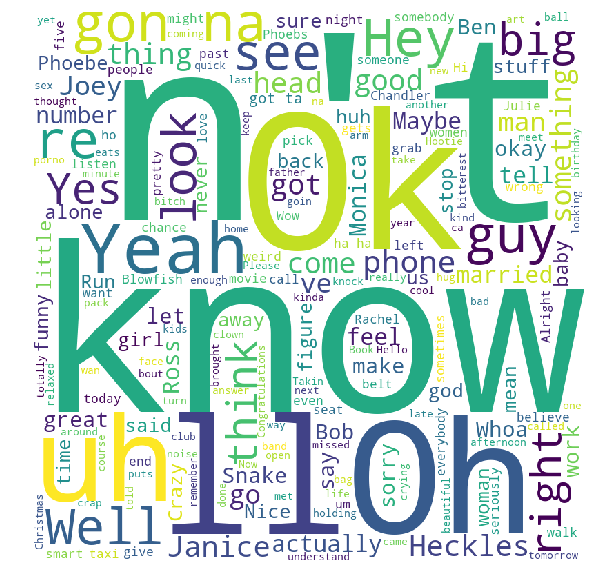

In [144]:
 plotwordcloud(friends_chars['CHANDLER'])

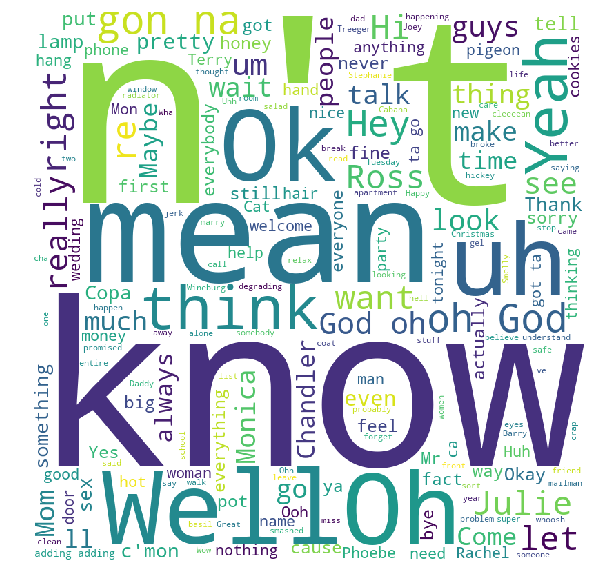

In [145]:
 plotwordcloud(friends_chars['RACHEL'])

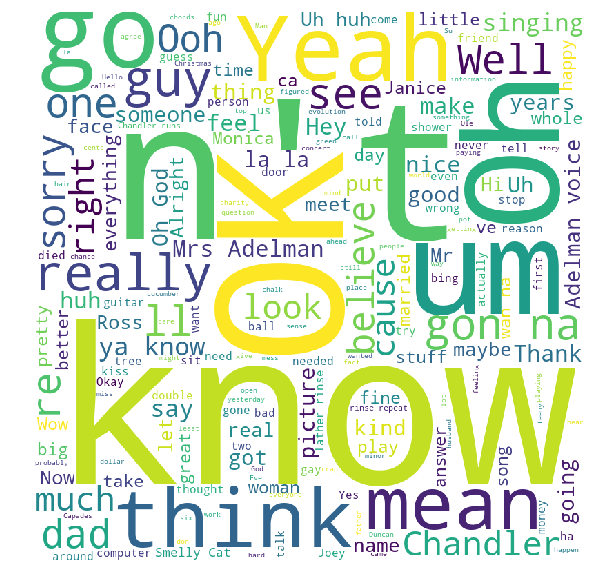

In [146]:
  plotwordcloud(friends_chars['PHOEBE'])

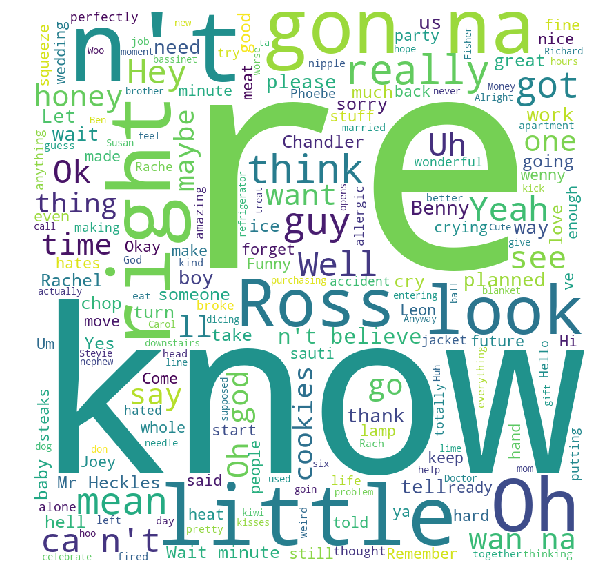

In [147]:
 plotwordcloud(friends_chars['MONICA'])

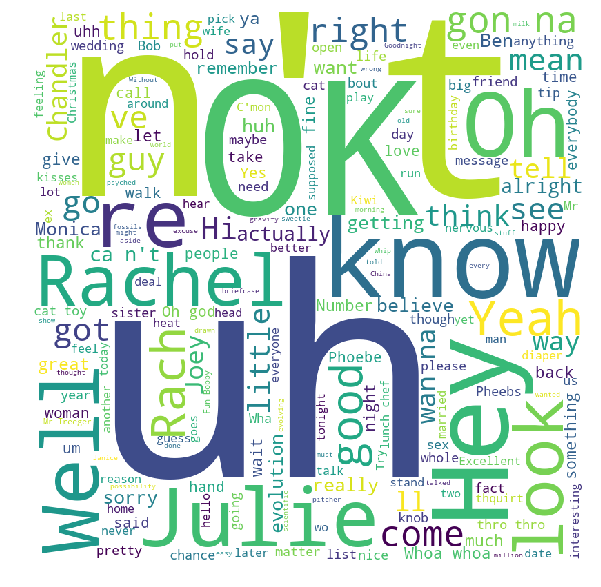

In [148]:
 plotwordcloud(friends_chars['ROSS'])